In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
cd /content/drive/My Drive/C13550/Lesson05/

/content/drive/My Drive/C13550/Lesson05


In [0]:
from keras.datasets import fashion_mnist 
(x_train, y_train), (x_test, y_test) =fashion_mnist.load_data()
import random
random.seed(42) 

In [0]:
import numpy as np
from keras import utils as np_utils
from sklearn import metrics
from sklearn.utils import shuffle
x_train = (x_train.astype(np.float32))/255.0 
x_test = (x_test.astype(np.float32))/255.0 
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1) 
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1) 
y_train = np_utils.to_categorical(y_train, 10) 
y_test = np_utils.to_categorical(y_test, 10) 
input_shape = x_train.shape[1:]

In [0]:
from keras.models import Sequential
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Input, Dense, Dropout, Flatten
from keras.layers import Conv2D, Activation, BatchNormalization

In [0]:
def CNN(input_shape):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), padding='same', strides=(2,2), input_shape=input_shape))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(32, kernel_size=(3, 3), padding='same', strides=(2,2)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Conv2D(64, kernel_size=(3, 3), padding='same', strides=(2,2)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, kernel_size=(3, 3), padding='same', strides=(2,2)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(10, activation="softmax"))
    return model


In [0]:
model = CNN(input_shape)

model.compile(loss='categorical_crossentropy', optimizer='Adadelta', metrics=['accuracy'])

ckpt = ModelCheckpoint('model.h5', save_best_only=True,monitor='val_loss', mode='min', save_weights_only=False) 
earlyStopping = EarlyStopping(monitor='val_loss', patience=5, verbose=0,mode='min')


In [0]:
model.fit(x_train, y_train, batch_size=128, epochs=100, verbose=1, validation_data=(x_test, y_test), callbacks=[ckpt,earlyStopping])


Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 164s 3ms/step - loss: 0.6357 - acc: 0.7836 - val_loss: 0.4084 - val_acc: 0.8589
Epoch 2/100
60000/60000 [==============================] - 156s 3ms/step - loss: 0.3870 - acc: 0.8600 - val_loss: 0.3377 - val_acc: 0.8701
Epoch 3/100
60000/60000 [==============================] - 157s 3ms/step - loss: 0.3268 - acc: 0.8780 - val_loss: 0.3579 - val_acc: 0.8723
Epoch 4/100
60000/60000 [==============================] - 158s 3ms/step - loss: 0.2955 - acc: 0.8906 - val_loss: 0.2706 - val_acc: 0.9003
Epoch 5/100
60000/60000 [==============================] - 160s 3ms/step - loss: 0.2740 - acc: 0.8998 - val_loss: 0.2708 - val_acc: 0.8981
Epoch 6/100
60000/60000 [==============================] - 160s 3ms/step - loss: 0.2589 - acc: 0.9041 - val_loss: 0.2676 - val_acc: 0.9047
Epoch 7/100
60000/60000 [==============================] - 157s 3ms/

In [0]:
from sklearn import metrics
# Make a prediction
print ("Making predictions...")
model.load_weights('model.h5')
#y_pred = model.predict(x_test)
y_pred = model.predict(x_test, batch_size=64, verbose=0)
y_pred = np.argmax(y_pred, axis=1)
y_test_aux = y_test.copy()
y_test_pred = list()
for i in y_test_aux:
    y_test_pred.append(np.argmax(i))

print (y_pred)

# Evaluate the prediction
accuracy = metrics.accuracy_score(y_test_pred, y_pred)
precision, recall, f1, support = metrics.precision_recall_fscore_support(y_test_pred, y_pred, average=None)
print('\nFinal results...')
print(metrics.classification_report(y_test_pred, y_pred))
print('Acc      : %.4f' % accuracy)
print('Precision: %.4f' % np.average(precision))
print('Recall   : %.4f' % np.average(recall))
print('F1       : %.4f' % np.average(f1))
print('Support  :', np.sum(support))

Making predictions...
[9 2 1 ... 8 1 5]

Final results...
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1000
           1       0.99      0.98      0.99      1000
           2       0.87      0.89      0.88      1000
           3       0.91      0.95      0.93      1000
           4       0.88      0.88      0.88      1000
           5       0.98      0.98      0.98      1000
           6       0.80      0.71      0.75      1000
           7       0.95      0.98      0.97      1000
           8       0.98      0.98      0.98      1000
           9       0.98      0.96      0.97      1000

   micro avg       0.92      0.92      0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

Acc      : 0.9209
Precision: 0.9202
Recall   : 0.9209
F1       : 0.9201
Support  : 10000


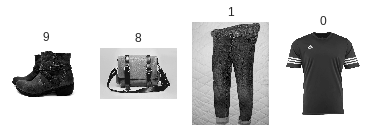

In [0]:
import cv2 
from matplotlib import pyplot as plt

images = ['ankle-boot.jpg', 'bag.jpg', 'trousers.jpg', 't-shirt.jpg'] 
 
for number in range(len(images)):
  imgLoaded = cv2.imread('Dataset/testing/%s'%(images[number]),0) 
  img = cv2.resize(imgLoaded, (28, 28)) 
  img = np.invert(img) 
  img = (img.astype(np.float32))/255.0 
  img = img.reshape(1, 28, 28, 1) 
  
  plt.subplot(1,5,number+1),plt.imshow(imgLoaded,'gray') 
  plt.title(np.argmax(model.predict(img)[0])) 
  plt.xticks([]),plt.yticks([]) 
plt.show()
